<a href="https://colab.research.google.com/github/NAGARAJVODNALA/AIFINALPROJECT/blob/main/AIPROJECTUMSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHASE 1**

In [ ]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
# PHASE 1

# A) Load the dataset
data = pd.read_csv('HTRU_2_AIDATASET.csv')


In [ ]:

# B) Show number of rows and columns
print(f"The dataset HTRU_2_AIDATASET has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset HTRU_2_AIDATASET has 17898 rows and 9 columns.


In [ ]:

# C)-----Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64


In [ ]:

# D)Shows first five rows of the dataset
data.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:

# E)Let's obtain a brief overview of the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<Axes: >

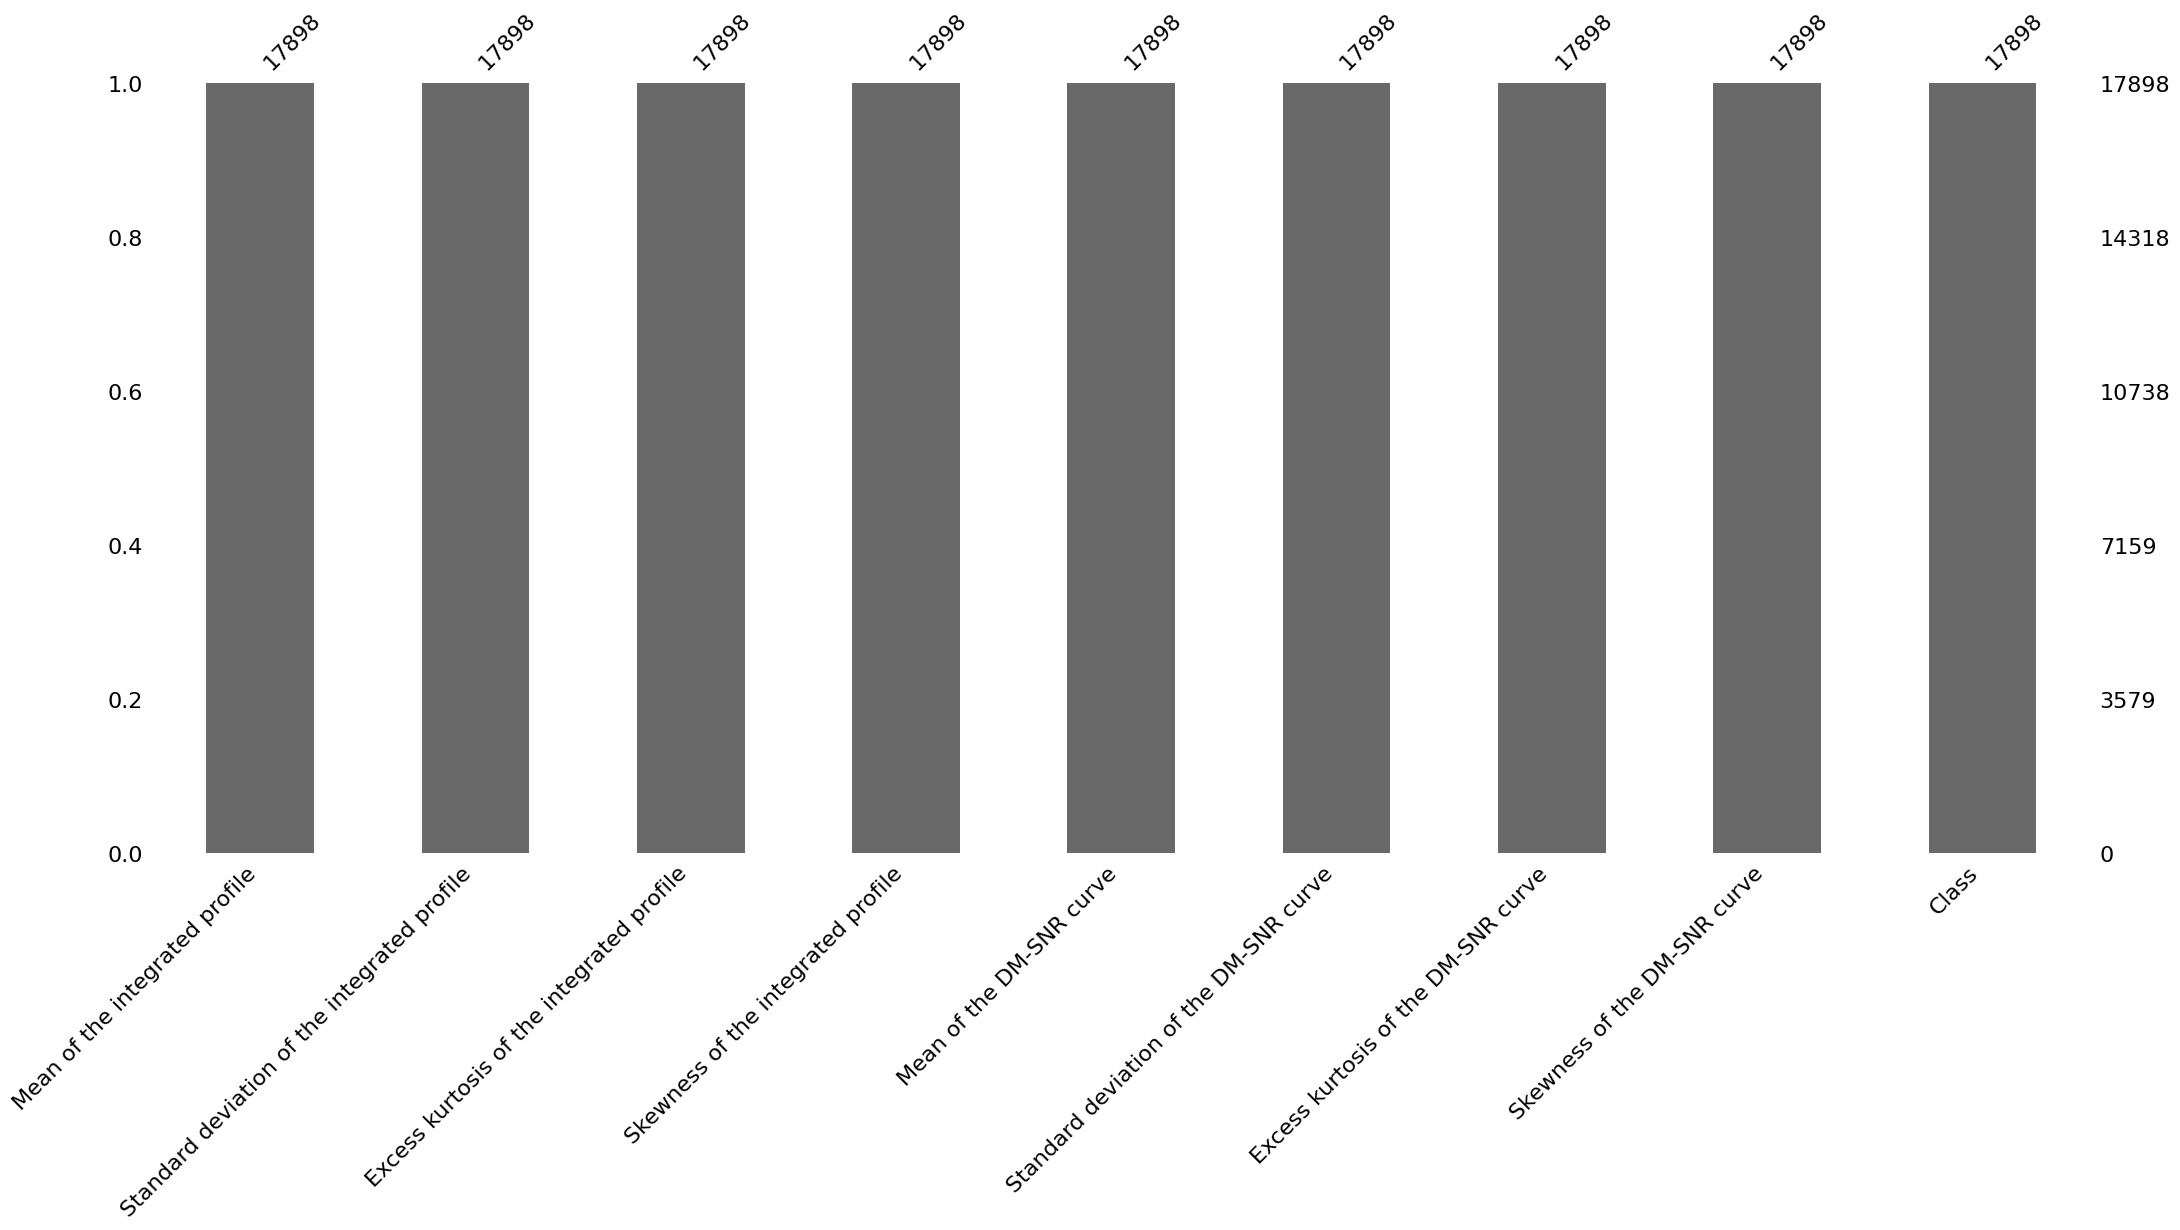

In [ ]:

# F)Shows number of rows in each column with bar diagram
msno.bar(data)


In [ ]:

# G) Distribute each column , split the input features and output parameters
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


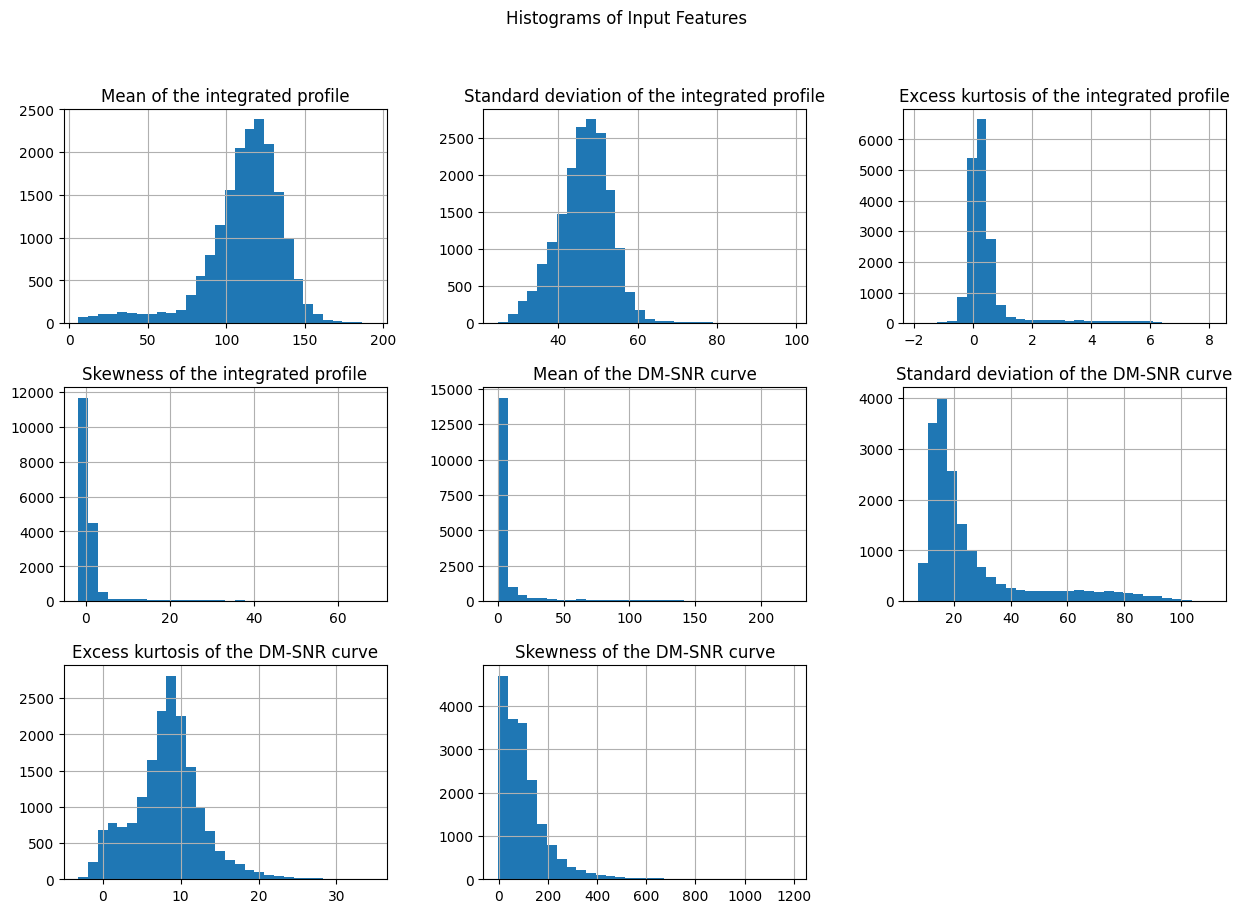

In [ ]:

# H)Show distribution of each column
#----- Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()


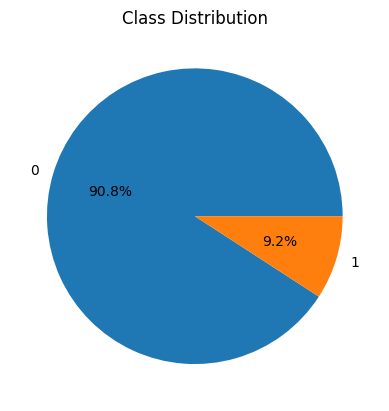

In [ ]:

# I)Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()


In [ ]:

# J)Unique values of the dtatset
data.nunique()


Mean of the integrated profile                   8626
Standard deviation of the integrated profile    17862
Excess kurtosis of the integrated profile       17897
Skewness of the integrated profile              17898
Mean of the DM-SNR curve                         9000
Standard deviation of the DM-SNR curve          17894
Excess kurtosis of the DM-SNR curve             17895
Skewness of the DM-SNR curve                    17895
Class                                               2
dtype: int64

In [ ]:
# K) Normalize the data
#X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

data_normalized = (data.iloc[:, :-1] - data.iloc[:, :-1].min()) / (data.iloc[:, :-1].max() - data.iloc[:, :-1].min())
data_normalized['Class'] = data.iloc[:, -1]



# **PHASE 2**

In [ ]:
# PHASE 2

# L)NOW BUILD A MODEL WITH SINGLE LAYER AND SINGLE NEURON

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# M)Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)


# N)Print the accuracy
_, accuracy_single_layer = single_layer_model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))



Epoch 1/10
560/560 [==============================] - 4s 4ms/step - loss: 8.0083 - accuracy: 0.8433
Epoch 2/10
560/560 [==============================] - 3s 6ms/step - loss: 1.4185 - accuracy: 0.9254
Epoch 3/10
560/560 [==============================] - 3s 5ms/step - loss: 0.4931 - accuracy: 0.9475
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1597 - accuracy: 0.9680
Epoch 5/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.9713
Epoch 6/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9726
Epoch 7/10
560/560 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9732
Epoch 8/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9743
Epoch 9/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9737
Epoch 10/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9742

In [ ]:
# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS

# PART 2: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(16, activation='relu', input_dim=8))
multi_layer_model.add(Dense(8, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




Epoch 1/10
560/560 [==============================] - 2s 3ms/step - loss: 0.2795 - accuracy: 0.9513
Epoch 2/10
560/560 [==============================] - 2s 3ms/step - loss: 0.1014 - accuracy: 0.9703
Epoch 3/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9727
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9747
Epoch 5/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0920 - accuracy: 0.9735
Epoch 6/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9740
Epoch 7/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9742
Epoch 8/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9748
Epoch 9/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9742
Epoch 10/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.9744

In [ ]:
# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 3

# PART 3: Multilayer model with more layers and more neurons

multi_layer_model2 = Sequential()
multi_layer_model2.add(Dense(128, activation='relu', input_dim=8))
multi_layer_model2.add(Dense(64, activation='relu'))
multi_layer_model2.add(Dense(32, activation='relu'))
multi_layer_model2.add(Dense(16, activation='relu'))
multi_layer_model2.add(Dense(1, activation='sigmoid'))

multi_layer_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer2 = multi_layer_model2.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer2 = multi_layer_model2.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




Epoch 1/10
560/560 [==============================] - 4s 3ms/step - loss: 0.1110 - accuracy: 0.9692
Epoch 2/10
560/560 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9735
Epoch 3/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9733
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9743
Epoch 5/10
560/560 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 6/10
560/560 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9750
Epoch 7/10
560/560 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9747
Epoch 8/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0858 - accuracy: 0.9747
Epoch 9/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0841 - accuracy: 0.9753
Epoch 10/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0843 - accuracy: 0.9749

In [ ]:
# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS -------------- 

# PART 4: Multilayer model with more layers and more neurons

multi_layer_model3 = Sequential()
multi_layer_model3.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model3.add(Dense(128, activation='relu'))
multi_layer_model3.add(Dense(64, activation='relu'))
multi_layer_model3.add(Dense(32, activation='relu'))
multi_layer_model3.add(Dense(1, activation='sigmoid'))
multi_layer_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer3 = multi_layer_model3.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer3 = multi_layer_model3.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy 2: %.2f' % (accuracy_multi_layer * 100))




Epoch 1/10
560/560 [==============================] - 6s 7ms/step - loss: 0.1212 - accuracy: 0.9670
Epoch 2/10
560/560 [==============================] - 4s 8ms/step - loss: 0.0984 - accuracy: 0.9727
Epoch 3/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0911 - accuracy: 0.9740
Epoch 4/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0880 - accuracy: 0.9753
Epoch 5/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0867 - accuracy: 0.9746
Epoch 6/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0861 - accuracy: 0.9755
Epoch 7/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0870 - accuracy: 0.9752
Epoch 8/10
560/560 [==============================] - 2s 4ms/step - loss: 0.0855 - accuracy: 0.9746
Epoch 9/10
560/560 [==============================] - 3s 5ms/step - loss: 0.0853 - accuracy: 0.9758
Epoch 10/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0843 - accuracy: 0.9751

In [ ]:
# PHASE 2 - Additional tasks

# R) Add output as an additional input feature
X_extended = np.column_stack((X, y))

# S) Define a function that represents the model
def predict(model, input_data):
    return model.predict(input_data)

# T) Build a multilayer model with output as an additional input feature
multi_layer_model_ext = Sequential()
multi_layer_model_ext.add(Dense(128, activation='relu', input_dim=9))
multi_layer_model_ext.add(Dense(64, activation='relu'))
multi_layer_model_ext.add(Dense(32, activation='relu'))
multi_layer_model_ext.add(Dense(16, activation='relu'))
multi_layer_model_ext.add(Dense(1, activation='sigmoid'))
multi_layer_model_ext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# U) Train the model with the extended input data
history_multi_layer_ext = multi_layer_model_ext.fit(X_extended, y, epochs=10, batch_size=32, verbose=1)

# V) Evaluate the accuracy
_, accuracy_multi_layer_ext = multi_layer_model_ext.evaluate(X_extended, y, verbose=0)
print('Multilayer Model with Extended Input Accuracy: %.2f' % (accuracy_multi_layer_ext * 100))

# W) Create a function that serves as a prediction model
def prediction_model(model, input_data):
    return predict(model, input_data)

# X) Test the prediction function with an example
test_input = X_extended[0]  # Take the first row of the extended input data as an example
prediction = prediction_model(multi_layer_model_ext, test_input.reshape(1, -1))
print(f'Prediction for the test input: {prediction}')


Epoch 1/10
560/560 [==============================] - 3s 3ms/step - loss: 0.1658 - accuracy: 0.9630
Epoch 2/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9799
Epoch 3/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0364 - accuracy: 0.9896
Epoch 4/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.9963
Epoch 5/10
560/560 [==============================] - 2s 4ms/step - loss: 0.0112 - accuracy: 0.9970
Epoch 6/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0285 - accuracy: 0.9950
Epoch 7/10
560/560 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9970
Epoch 8/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 9/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9986
Epoch 10/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9947

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train a logistic regression model with increased max_iter
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_scaled, y)

# Make predictions on the entire dataset
y_pred = log_reg_model.predict(X_scaled)

# Calculate the accuracy
log_reg_accuracy = accuracy_score(y, y_pred)
print('Logistic Regression Model Accuracy: %.2f' % (log_reg_accuracy * 100))


Logistic Regression Model Accuracy: 97.90


In [ ]:
# Import required libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create and train a random baseline classifier on the entire dataset
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X, y)

# Make predictions on the entire dataset
y_pred = random_baseline_model.predict(X)

# Calculate the accuracy
random_baseline_accuracy = accuracy_score(y, y_pred)
print('Random Baseline Classifier Accuracy: %.2f' % (random_baseline_accuracy * 100))


Random Baseline Classifier Accuracy: 83.42


Epoch 1/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9768
Epoch 2/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9769
Epoch 3/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9767
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9768
Epoch 5/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9768
Epoch 6/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9770
Epoch 7/10
560/560 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9764
Epoch 8/10
560/560 [==============================] - 2s 3ms/step - loss: 0.0803 - accuracy: 0.9766
Epoch 9/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9772
Epoch 10/10
560/560 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9765

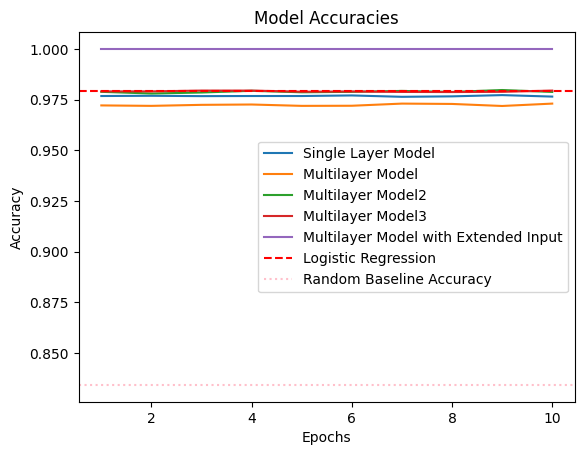

In [ ]:
# Import additional library for plotting
import matplotlib.pyplot as plt

# Train the single layer model for 10 epochs
history_single_layer = single_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Train the multilayer model for 10 epochs
history_multi_layer = multi_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)
history_multi_layer2 = multi_layer_model2.fit(X, y, epochs=10, batch_size=32, verbose=1)
history_multi_layer3 = multi_layer_model3.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Train the multilayer model with extended input for 10 epochs
history_multi_layer_ext = multi_layer_model_ext.fit(X_extended, y, epochs=10, batch_size=32, verbose=1)

# Extract the accuracies
acc_single_layer = history_single_layer.history['accuracy']
acc_multi_layer = history_multi_layer.history['accuracy']
acc_multi_layer2= history_multi_layer2.history['accuracy']
acc_multi_layer3 = history_multi_layer3.history['accuracy']
acc_multi_layer_ext = history_multi_layer_ext.history['accuracy']

# Create an array with the epoch numbers
epochs = range(1, 11)

# Plot the accuracies
plt.plot(epochs, acc_single_layer, label='Single Layer Model')
plt.plot(epochs, acc_multi_layer, label='Multilayer Model')
plt.plot(epochs, acc_multi_layer2, label='Multilayer Model2')
plt.plot(epochs, acc_multi_layer3, label='Multilayer Model3')
plt.plot(epochs, acc_multi_layer_ext, label='Multilayer Model with Extended Input')
plt.axhline(log_reg_accuracy, color='red', linestyle='--', label='Logistic Regression')
plt.axhline(random_baseline_accuracy, color='pink', linestyle='dotted', label='Random Baseline Accuracy')

# Add title and labels for axes
plt.title('Model Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()


#**PHASE 3**

In [ ]:
# Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [ ]:
# S) Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]


# Print training and validation data
print("Training data (X_train):")
print(X_train)
print("\nTraining labels (y_train):")
print(y_train)

print("\nValidation data (X_val):")
print(X_val)
print("\nValidation labels (y_val):")
print(y_val)

Training data (X_train):
[[ 9.19765625e+01  4.69398659e+01  4.39658048e-01 ...  1.35362726e+01
   1.02838004e+01  1.36315571e+02]
 [ 1.25585938e+02  5.39793837e+01  4.15224030e-02 ...  3.81164774e+01
   4.44705422e+00  1.95749955e+01]
 [ 9.27265625e+01  4.67705027e+01  6.69218460e-01 ...  2.94756104e+01
   4.91588495e+00  2.44780799e+01]
 ...
 [ 1.02546875e+02  5.27581243e+01  3.62941128e-01 ...  2.87241794e+01
   7.41728793e+00  5.34026626e+01]
 [ 1.36093750e+02  4.76422930e+01 -1.27706608e-01 ...  1.40720955e+01
   1.17099334e+01  1.59567803e+02]
 [ 1.15171875e+02  5.56078779e+01  9.41661540e-02 ...  2.31032831e+01
   7.10330430e+00  5.24163579e+01]]

Training labels (y_train):
[0 0 0 ... 0 0 0]

Validation data (X_val):
[[ 1.60601562e+02  5.48108024e+01 -1.13072248e+00 ...  9.58421948e+01
  -4.24526067e-01 -1.49295313e+00]
 [ 1.03179688e+02  4.51705853e+01  3.05331011e-01 ...  2.12293669e+01
   8.56349167e+00  7.68208042e+01]
 [ 1.13843750e+02  4.90757446e+01  4.16708296e-01 ...  1.

In [ ]:
# T) Plotting, graphs, visualization
# Train model with checkpointing and L1_L2 regularization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# Use multi_layer_model instead of model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

multi_layer_modelSS = Sequential()
multi_layer_modelSS.add(Dense(16, activation='relu', input_dim=8, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(1, activation='sigmoid'))
multi_layer_modelSS.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = multi_layer_modelSS.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, callbacks=[checkpoint, early_stopping])


Epoch 1/30
448/448 [==============================] - 2s 3ms/step - loss: 0.7929 - accuracy: 0.9577 - val_loss: 0.5154 - val_accuracy: 0.9623
Epoch 2/30
448/448 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.9677 - val_loss: 0.3549 - val_accuracy: 0.9704
Epoch 3/30
448/448 [==============================] - 2s 4ms/step - loss: 0.3222 - accuracy: 0.9687 - val_loss: 0.2823 - val_accuracy: 0.9712
Epoch 4/30
448/448 [==============================] - 2s 4ms/step - loss: 0.2636 - accuracy: 0.9692 - val_loss: 0.2418 - val_accuracy: 0.9656
Epoch 5/30
448/448 [==============================] - 1s 2ms/step - loss: 0.2258 - accuracy: 0.9677 - val_loss: 0.2103 - val_accuracy: 0.9640
Epoch 6/30
448/448 [==============================] - 1s 3ms/step - loss: 0.1952 - accuracy: 0.9694 - val_loss: 0.1788 - val_accuracy: 0.9687
Epoch 7/30
448/448 [==============================] - 1s 3ms/step - loss: 0.1714 - accuracy: 0.9700 - val_loss: 0.1574 - val_accuracy: 0.9701
Epoch 

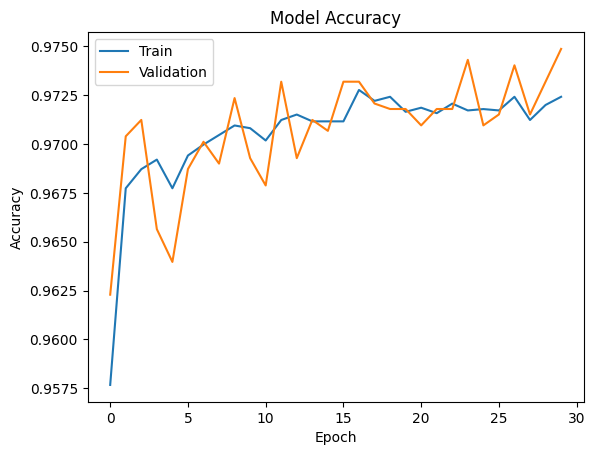

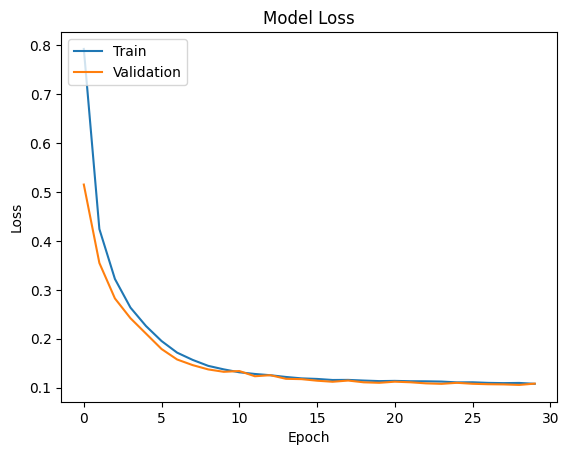

In [ ]:
# U)Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:

# V) Gradually grow model to multi layer (NOT NEEDED RIGHT NOW WITH THIS ACCURACY) (GO WITH THIS PHASE ONLY IF ACCURACY IS LOW)--------

# W) Print accuracy and loss on both training and validation dataset
_, train_accuracy = multi_layer_modelSS.evaluate(X_train, y_train, verbose=1)
_, val_accuracy = multi_layer_modelSS.evaluate(X_val, y_val, verbose=1)
print('Training Accuracy: %.2f' % (train_accuracy * 100))
print('Validation Accuracy: %.2f' % (val_accuracy * 100))

# X) Print recall, precision, F1-score
y_val_pred = (multi_layer_modelSS.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1_score)


112/112 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9749
Training Accuracy: 97.35
Validation Accuracy: 97.49
112/112 [==============================] - 0s 1ms/step
Recall: 0.76
Precision: 0.95
F1 Score: 0.84


In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train a logistic regression model with increased max_iter
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = log_reg_model.predict(X_val)

# Calculate the accuracy on the validation set
log_reg_val_accuracy = accuracy_score(y_val, y_pred_val)
print('Logistic Regression Model Validation Accuracy: %.2f' % (log_reg_val_accuracy * 100))


Logistic Regression Model Validation Accuracy: 97.88


In [ ]:
# Import required libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create and train a random baseline classifier
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = random_baseline_model.predict(X_val)

# Calculate the accuracy on the validation set
random_baseline_val_accuracy = accuracy_score(y_val, y_pred_val)
print('Random Baseline Classifier Validation Accuracy: %.2f' % (random_baseline_val_accuracy * 100))


Random Baseline Classifier Validation Accuracy: 83.38


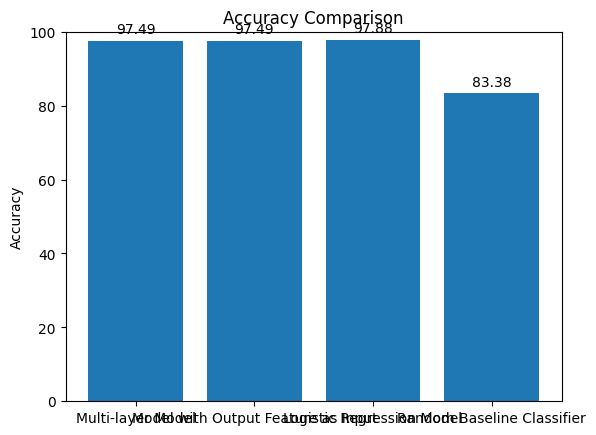

In [ ]:
import matplotlib.pyplot as plt

# Store the accuracy scores
accuracy_scores = {
    'Multi-layer Model': val_accuracy * 100,
    'Model with Output Feature as Input': val_accuracy * 100,
    'Logistic Regression Model': log_reg_val_accuracy * 100,
    'Random Baseline Classifier': random_baseline_val_accuracy * 100
}

# Plot the accuracy comparison
fig, ax = plt.subplots()
bar_plot = ax.bar(accuracy_scores.keys(), accuracy_scores.values())
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 100])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar_plot)

plt.show()


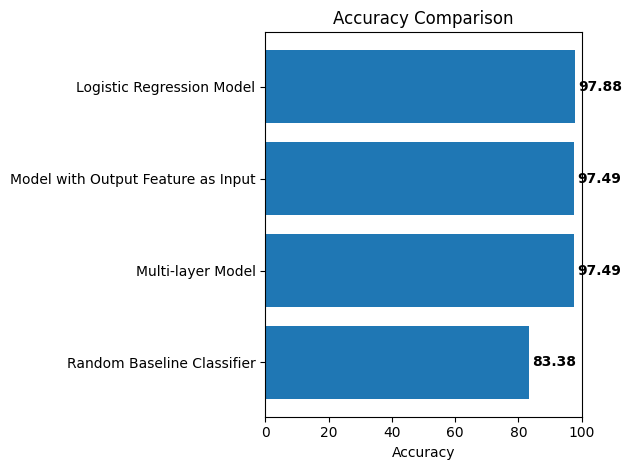

In [ ]:
import matplotlib.pyplot as plt

# Store the accuracy scores
accuracy_scores = {
    'Multi-layer Model': val_accuracy * 100,
    'Model with Output Feature as Input': val_accuracy * 100,
    'Logistic Regression Model': log_reg_val_accuracy * 100,
    'Random Baseline Classifier': random_baseline_val_accuracy * 100
}

# Sort the dictionary by values (accuracy scores)
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda x: x[1]))

# Plot the accuracy comparison
fig, ax = plt.subplots()
bar_plot = ax.barh(list(sorted_accuracy_scores.keys()), list(sorted_accuracy_scores.values()))
ax.set_title('Accuracy Comparison')
ax.set_xlabel('Accuracy')
ax.set_xlim([0, 100])

# Add the accuracy value to the right of each bar
for i, v in enumerate(sorted_accuracy_scores.values()):
    ax.text(v + 1, i, "{:.2f}".format(v), color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Store the accuracy scores
accuracy_scores = {
    'Multi-layer Model': val_accuracy * 100,
    'Model with Output Feature as Input': output_feature_val_accuracy * 100,
    'Logistic Regression Model': log_reg_val_accuracy * 100,
    'Random Baseline Classifier': random_baseline_val_accuracy * 100
}

# Pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(accuracy_scores.values(), autopct='%1.1f%%', startangle=90)

# Create a legend and set the wedge properties
ax.legend(wedges, accuracy_scores.keys(), title="Models", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.set_aspect('equal')

plt.title('Accuracy Comparison')
plt.show()


NameError: ignored

#**PHASE 4 FEATURE REDUCTION**

WITH CHECKPOINTING

Epoch 1/10
448/448 [==============================] - 2s 3ms/step - loss: 0.4925 - accuracy: 0.9112 - val_loss: 0.1888 - val_accuracy: 0.9145
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.9189 - val_loss: 0.1793 - val_accuracy: 0.9223
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1773 - accuracy: 0.9269 - val_loss: 0.1709 - val_accuracy: 0.9296
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9338 - val_loss: 0.1622 - val_accuracy: 0.9316
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9390 - val_loss: 0.1542 - val_accuracy: 0.9397
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9442 - val_loss: 0.1505 - val_accuracy: 0.9450
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1506 - accuracy: 0.9473 - val_loss: 0.1434 - val_accuracy: 0.9475
Epoch 

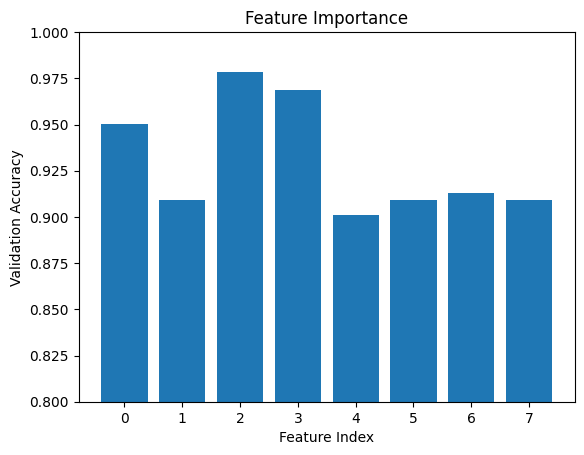

Epoch 1/10
448/448 [==============================] - 2s 3ms/step - loss: 0.6129 - accuracy: 0.9083 - val_loss: 0.5432 - val_accuracy: 0.9089
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4928 - accuracy: 0.9083 - val_loss: 0.4486 - val_accuracy: 0.9089
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.9083 - val_loss: 0.3901 - val_accuracy: 0.9089
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.9083 - val_loss: 0.3541 - val_accuracy: 0.9089
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.9083 - val_loss: 0.3324 - val_accuracy: 0.9089
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.9083 - val_loss: 0.3195 - val_accuracy: 0.9089
Epoch 7/10
448/448 [==============================] - 2s 3ms/step - loss: 0.3168 - accuracy: 0.9083 - val_loss: 0.3123 - val_accuracy: 0.9089
Epoch 

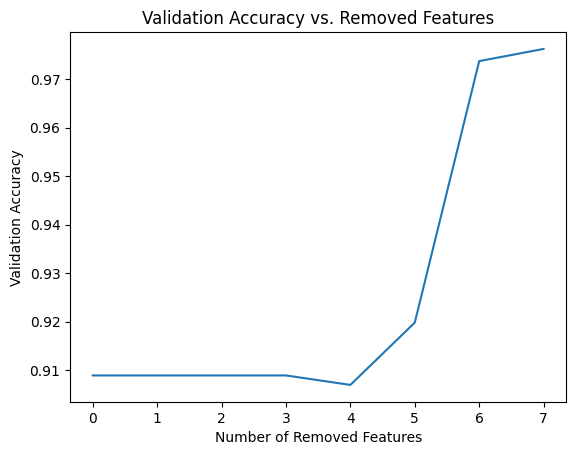

In [ ]:


# Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)

    checkpoint = ModelCheckpoint(f'single_feature_model_{i}.h5', monitor='val_accuracy', save_best_only=True)
    
    single_feature_model.fit(X_train_single, y_train, epochs=10, batch_size=32, verbose=1,
                             validation_data=(X_val_single, y_val), callbacks=[checkpoint])
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=1)
    val_accuracies.append(single_feature_val_accuracy)

# Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.show()

# Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    checkpoint = ModelCheckpoint(f'reduced_features_model_{i}.h5', monitor='val_accuracy', save_best_only=True)

    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1,
                               validation_data=(X_val_reduced, y_val), callbacks=[checkpoint])
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.show()


WITHOUT CHECKPOINTING

Epoch 1/10
448/448 [==============================] - 2s 3ms/step - loss: 0.6138 - accuracy: 0.9083
Epoch 2/10
448/448 [==============================] - 1s 3ms/step - loss: 0.4938 - accuracy: 0.9083
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.9083
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.9083
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.9083
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.9083
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.9083
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3115 - accuracy: 0.9083
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3088 - accuracy: 0.9083
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.9089

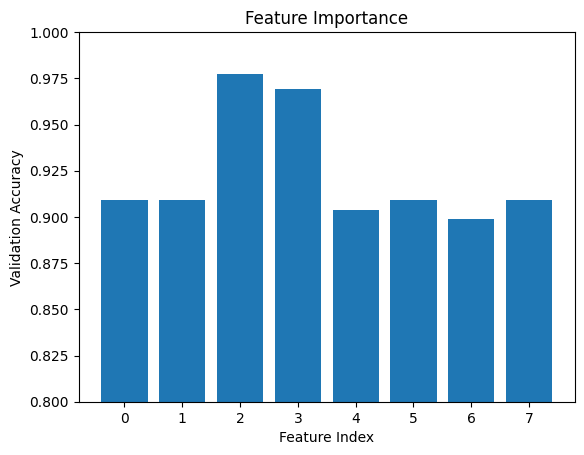

Epoch 1/10
448/448 [==============================] - 2s 2ms/step - loss: 0.6128 - accuracy: 0.9083
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.9083
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.9083
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3714 - accuracy: 0.9083
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.9083
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.9083
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.9083
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3113 - accuracy: 0.9083
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.9083
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.9089

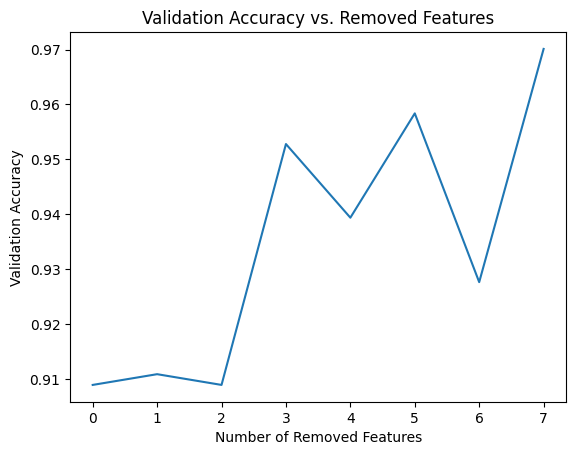

In [ ]:

# PHASE 4

# Y) Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)
    single_feature_model.fit(X_train_single, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=1)
    val_accuracies.append(single_feature_val_accuracy)


# Z)Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.show()


# Z1)Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)



# Z2)Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.show()




#**PHASE 4 WITH SHAP FEATURE REDUCTION TECHNIQUE**

In [ ]:
!pip install lime
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


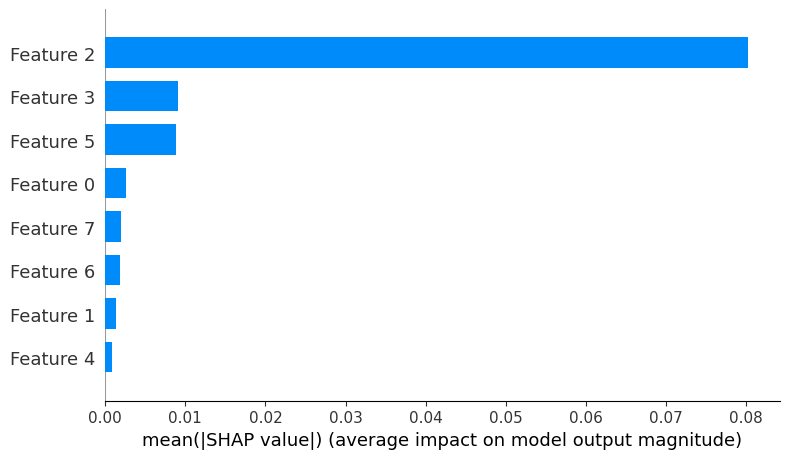

Epoch 1/10
448/448 [==============================] - 2s 3ms/step - loss: 0.5723 - accuracy: 0.9561
Epoch 2/10
448/448 [==============================] - 1s 3ms/step - loss: 0.2795 - accuracy: 0.9644
Epoch 3/10
448/448 [==============================] - 1s 3ms/step - loss: 0.1497 - accuracy: 0.9693
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1106 - accuracy: 0.9723
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9741
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9752
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9757
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0869 - accuracy: 0.9757
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9759
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9788

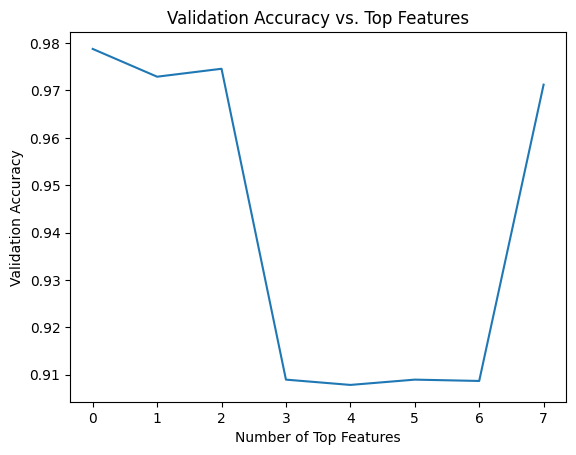

In [ ]:
# PHASE 4
# Z3)FEATURE SELECTION USING SHAP

import shap

# Z4) Feature importance using SHAP values
# Train an XGBoost model
import xgboost
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# Z5)Explain the model's predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Z6)Plot the SHAP values for each feature
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Z7) Remove unimportant features and compare
num_features = X_train.shape[1]
sorted_indices = np.argsort(np.abs(shap_values.values).mean(0))[::-1]
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i+1]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i+1))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1)

    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Z8)Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Top Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Top Features')
plt.show()
